In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

### Set the random seed

In [54]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [55]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')

# keep only every second row
#df = df.iloc[::2]

labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [56]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list or numpy array
- Report the average area under the ROC curve and the average average precision across the five folds

In [57]:
rocs = []
prcs = []
for train_index, test_index in skf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    model = LogisticRegression(max_iter = 10000, penalty = None)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rocs.append(roc_auc_score(y_test, y_pred))
    prcs.append(average_precision_score(y_test, y_pred))

/opt/miniconda3/envs/teaching39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/teaching39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [58]:
np.mean(rocs), np.mean(prcs)

(np.float64(0.6986206896551723), np.float64(0.8449569673329407))

### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision.
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [59]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

for ic, c in enumerate(cc):
        for ifo, (train_index, test_index) in enumerate(skf.split(features, labels)):
            X_train, X_test = features[train_index], features[test_index]
            y_train, y_test = labels[train_index], labels[test_index]
            model = LogisticRegression(max_iter = 10000, C=c, penalty='l2')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rocs[ic, ifo] = roc_auc_score(y_test, y_pred)
            prcs[ic, ifo] = average_precision_score(y_test, y_pred)

In [60]:
mu_rocs = np.mean(rocs, axis=1)
mu_prcs = np.mean(prcs, axis=1)

mu_rocs, mu_prcs

(array([0.66819923, 0.65896552, 0.70252874, 0.71264368, 0.71931034,
        0.70551724, 0.70206897, 0.69873563]),
 array([0.82608283, 0.82429359, 0.84673768, 0.85081706, 0.85319223,
        0.84765141, 0.846328  , 0.84478954]))

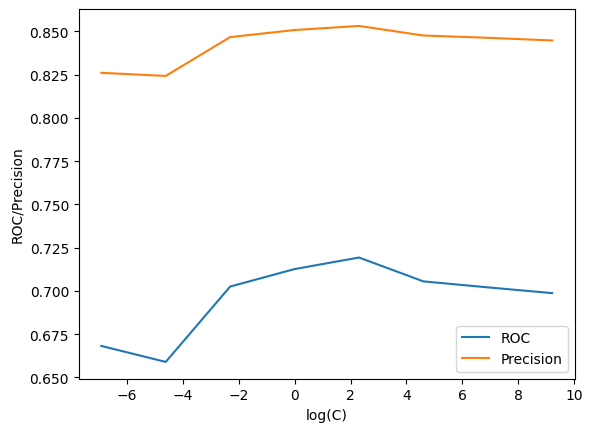

In [61]:
import matplotlib.pyplot as plt
plt.plot(np.log(cc), mu_rocs, label = 'ROC')
# plot the average precision on the right y-axis
plt.plot(np.log(cc), mu_prcs, label = 'Precision')
plt.xlabel('log(C)')
plt.ylabel('ROC/Precision')
plt.legend()

In [52]:
np.max(mu_rocs), cc[np.argmax(mu_rocs)]


(np.float64(0.7193103448275862), 10)

In [53]:
np.max(mu_prcs), cc[np.argmax(mu_prcs)]

(np.float64(0.8531922290252598), 10)